# Computing money multipliers in the data
## Caio Machado
## Macroeconomics II

### This is a complement to lecture note #2.

In [1]:
### Preamble
using Plots, RCall, DataFrames, DataFramesMeta
gr(legend=false,linewidth=2)

# R packages used through RCall:
R"""
foo <- c("tidyverse","fredr")
pacman::p_load(char = foo)
fredr_set_key("59edcd766b87f7feca168face94a5ffe") # Fred data API Key
"""

# The next function downloads data from Fred using RCall and the fredr package. 
function fredfun(var_id,var_name;frequency=false, observation_start="1600-01-01",
        observation_end="3000-01-01", aggregation_method="avg")
        @rput var_id observation_start observation_end frequency frequency aggregation_method
        R"""
        if (frequency == FALSE) {
                df <- fredr(series_id=var_id, observation_start = as.Date(observation_start), 
                observation_end = as.Date(observation_end))
        } else {
                df <- fredr(series_id=var_id, observation_start = as.Date(observation_start), 
                observation_end = as.Date(observation_end), frequency=frequency, aggregation_method=aggregation_method)
        }
        """
        @rget df
        select!(df,[:date,:value])
        rename!(df,:value=>var_name)
        return df
end;

SyntaxError: invalid syntax (<ipython-input-1-18cb3c166558>, line 2)

We will download data on M1, M2 and the US monetary base:

In [6]:
# Downloading data and formatting data:
m1 = fredfun("WM1NS","m1",frequency="m",aggregation_method="eop")
m2 = fredfun("WM2NS","m2",frequency="m",aggregation_method="eop")
base = fredfun("BOGMBASE","base",frequency="m",aggregation_method="eop")
base = @transform(base,base = :base/1000) # Monetary base is in million of dollars, m1 and m2 in billions
df = innerjoin(m1,m2,base,on=:date) # Joining dataframes

,date,m1,m2,base
,Date…,Float64?,Float64?,Float64
1,1980-11-01,410.9,1594.8,162.0
2,1980-12-01,415.8,1601.8,163.4
3,1981-01-01,404.7,1599.8,161.1
4,1981-02-01,402.6,1609.0,159.0
5,1981-03-01,409.8,1637.5,159.8
6,1981-04-01,425.4,1657.1,162.4
7,1981-05-01,411.0,1648.4,163.2
8,1981-06-01,416.4,1661.8,163.9
9,1981-07-01,419.5,1679.3,166.0


First, we plot the raw series:

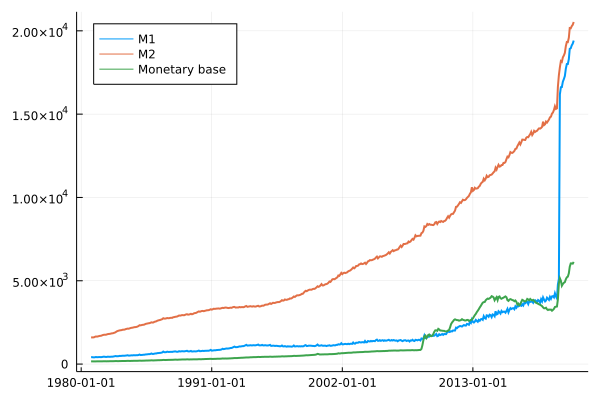

In [7]:
plot(df.date,df.m1,label="M1",legend=:topleft)
plot!(df.date,df.m2,label="M2")
plot!(df.date,df.base,label="Monetary base")

Now we plot the multipliers, dividing the money aggregates by the monetary base:

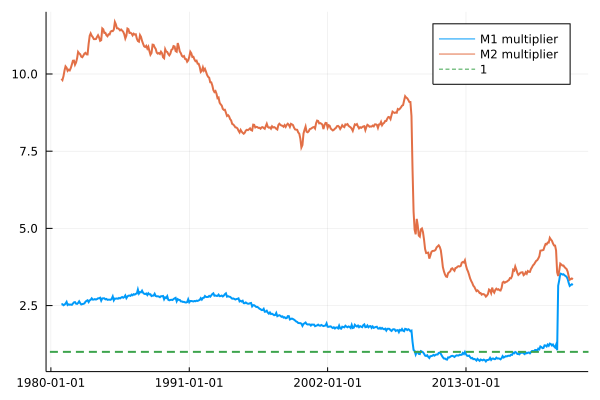

In [8]:
plot(df.date,df.m1 ./ df.base,label="M1 multiplier",legend=:topright)
plot!(df.date,df.m2 ./ df.base,label="M2 multiplier")
hline!([1], linestyle=:dash,label="1")

What happened with the M1 money multiplier? Why can it be below 1?